In [1]:
import phoebe
from phoebe import u, c

import numpy as np

import os
import sys
from pathlib import Path
baseModulePath = str(Path(os.getcwd()).parents[2].absolute())
if baseModulePath not in sys.path:
	sys.path.append(baseModulePath)

import importlib
import analisis.phoebe_model.utils as gen_utils
importlib.reload(gen_utils)

logger = phoebe.logger(clevel='WARNING')

Connection to online passbands at http://tables.phoebe-project.org could not be established.  Check your internet connection or try again later (can manually call phoebe.list_online_passbands(refresh=True) to retry).  If the problem persists and you're using a Mac, you may need to update openssl (see http://phoebe-project.org/help/faq). Original error from urlopen: HTTPError HTTP Error 503: Service Unavailable


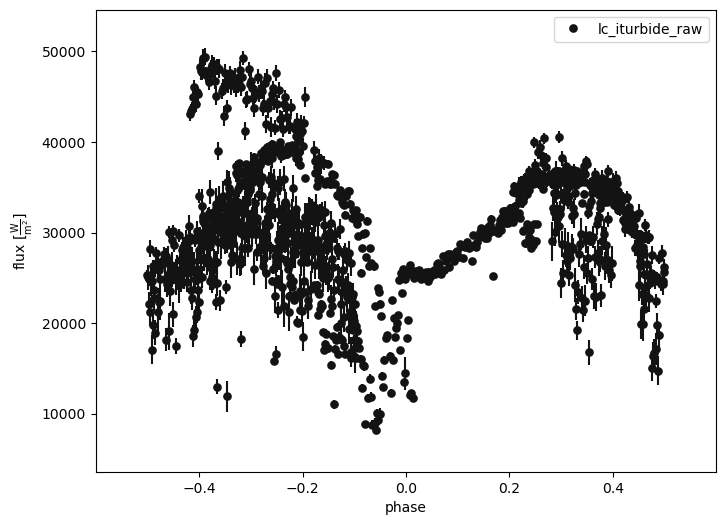

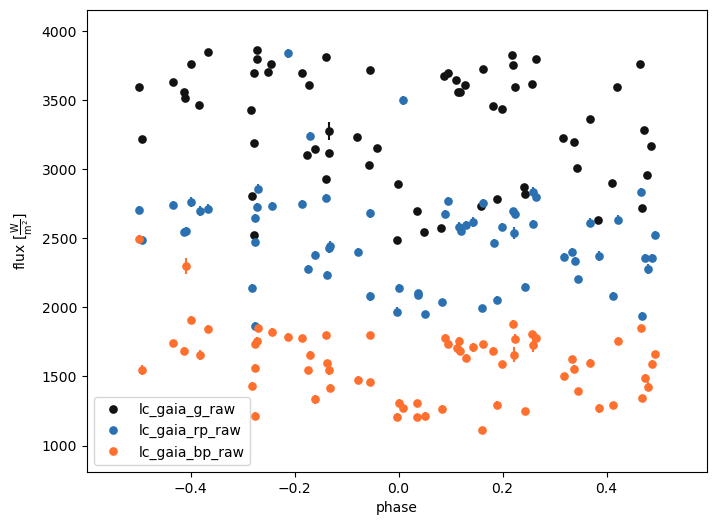

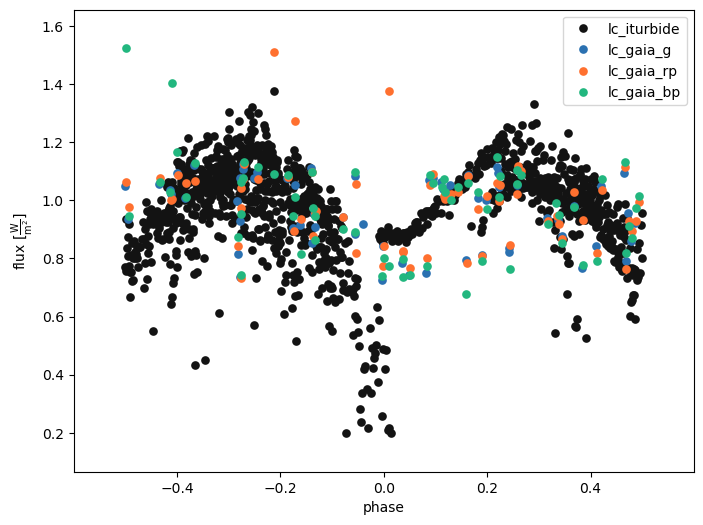

(<autofig.figure.Figure | 1 axes | 4 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [2]:
b = phoebe.load("../bundle-saves/manual-periodogram")
b = phoebe.load("../bundle-saves/manual-periodogram")

b.plot(x='phase', dataset='lc_iturbide_raw', show=True, legend=True, marker='.')
b.plot(x='phase', dataset=[d for d in b.datasets if 'raw' in d and 'gaia' in d], show=True, legend=True, marker='.')
b.plot(x='phase', dataset=[d for d in b.datasets if 'raw' not in d], show=True, legend=True, marker='.')

## `q` from $P_{orb} - q$ relation
Used mean value obtained from https://github.com/Somayeh91/p_q_relations_contact_binaries. Script ran using a period of $0.3332532532532533 \space \mathrm{d}^{-1}$ obtained
from PHOEBE's Lomb-Scargle periodogram estimator.

In [3]:
q_low = 0.3520822884458968
b.set_value(qualifier='q', value=q_low)

Mon, 24 Jul 2023 16:01 BUNDLE       ERROR   Constraint 'pot@contact_envelope@envelope@constraint' raised the following error while attempting to solve for 'pot@contact_envelope@envelope@component'.  Consider flipping the constraint or changing the value of one of ['requiv@primary@star@component', 'q@binary@orbit@component', 'sma@binary@orbit@component', 'pot@contact_envelope@envelope@component'] until the constraint succeeds.  Original error: roche_contact_Omega_at_partial_vol::Volume is outside bounds.
Mon, 24 Jul 2023 16:01 BUNDLE       ERROR   Constraint 'requiv@secondary@star@constraint' raised the following error while attempting to solve for 'requiv@secondary@star@component'.  Consider flipping the constraint or changing the value of one of ['pot@contact_envelope@envelope@component', 'q@binary@orbit@component', 'sma@binary@orbit@component', 'requiv@secondary@star@component'] until the constraint succeeds.  Original error: potential > L1 critical value
Mon, 24 Jul 2023 16:01 BUNDL

## ROTSE1 J164341.65+251748.1 paramter estimates

Assuming that this binary system is similar to ROTSE1 J164341.65+251748.1 given the near identical mass ratios. Parameters for binary system based off of light curve
solution given by **[Michel et al. (2016)]**. This will serve as the initial system estimation from which optimizers and samplers will be run.

**TODO:** confirm if systems can be treated as similar; namely through Gaia color HR diagram

In [4]:
print(b['requiv'])
print(b['sma@binary'])
print(b['pot'])
print(b['fillout_factor'])

ParameterSet: 3 parameters
         requiv@primary@component: 1.5 solRad
C      requiv@secondary@component: 1.4999999999999996 solRad
                requiv@constraint: pot_to_requiv_contact({pot@contact_envelope@component}, {q@binary@component}, {sma@binary@component}, 2)
Parameter: sma@binary@component
                       Qualifier: sma
                     Description: Semi-major axis of the orbit (defined at time t0@system)
                           Value: 3.35 solRad
                  Constrained by: 
                      Constrains: asini@binary@component, pot@contact_envelope@component, requiv@secondary@component, requivratio@binary@component, requivsumfrac@binary@component, mass@primary@component, sma@primary@component, asini@primary@component, requiv_max@primary@component, requiv_min@primary@component, mass@secondary@component, sma@secondary@component, asini@secondary@component, requiv_max@secondary@component, requiv_min@secondary@component
                      Related t

In [10]:
# %%script echo "skipping"
try:
	b.flip_constraint(qualifier='pot', solve_for='requiv@primary')
except ValueError:
	# phoebe seems to throw an error due to the radius value, but it flips the constraint properly
	pass

In [11]:
b.set_value(qualifier='incl', component='binary', value=84.35*u.deg)
b.set_value(qualifier='teff', component='primary', value=5648*u.K)
b.set_value(qualifier='teff', component='secondary', value=5873*u.K)
b.set_value(qualifier='pot', value=2.52)

gen_utils.resetAtmosphere(b)
print(b.run_checks(compute='phoebe01'))

print(b['fillout_factor'])

Mon, 24 Jul 2023 16:02 PASSBANDS    WARNING Online passbands unavailable (reached max tries).  Pass refresh=True to force another attempt or repeat_errors=False to avoid showing this message.


Run Checks Report: PASS

ParameterSet: 2 parameters
C  fillout_factor@contact_enve...: 0.2703806897111021
        fillout_factor@constraint: pot_to_fillout_factor({q@binary@component}, {pot@contact_envelope@component})


In [12]:
print(b['pblum'])
print(b['pblum_mode'])

ParameterSet: 7 parameters
   pblum@primary@lc_iturbide_r...: 12.566370614359172 W
   pblum@primary@lc_gaia_g@dat...: 12.566370614359172 W
   pblum@primary@lc_gaia_rp@da...: 12.566370614359172 W
   pblum@primary@lc_gaia_bp@da...: 12.566370614359172 W
   pblum@primary@lc_gaia_g_raw...: 12.566370614359172 W
   pblum@primary@lc_gaia_rp_ra...: 12.566370614359172 W
   pblum@primary@lc_gaia_bp_ra...: 12.566370614359172 W
ParameterSet: 8 parameters
   pblum_mode@lc_iturbide@dataset: dataset-scaled
   pblum_mode@lc_iturbide_raw@...: component-coupled
     pblum_mode@lc_gaia_g@dataset: component-coupled
    pblum_mode@lc_gaia_rp@dataset: component-coupled
    pblum_mode@lc_gaia_bp@dataset: component-coupled
   pblum_mode@lc_gaia_g_raw@da...: component-coupled
   pblum_mode@lc_gaia_rp_raw@d...: component-coupled
   pblum_mode@lc_gaia_bp_raw@d...: component-coupled


In [13]:
b.set_value_all(qualifier='pblum_mode', dataset='lc_iturbide', value='dataset-scaled')

In [ ]:
# TODO: try having iturbide dataset as dataset-scaled for pblum_mode instead
	# since 1 single light curve won't be enough to constrain temperature, might as well not try to fit for it
# b.set_value(qualifier='pblum', component='primary', dataset='lc_iturbide', value=3*np.pi)

gen_utils.avoidAtmosphereErrors(b)
b.run_compute(compute='fast_compute', model='rotse1_fast_model', overwrite=True)
b.plot(x='phase', dataset='lc_iturbide', show=True, legend=True)
# animateMesh(b, logger)

In [ ]:
gen_utils.animateMesh(b, logger)
gen_utils.animateMesh(b, logger, component='primary')
gen_utils.animateMesh(b, logger, component='secondary')

<Figure size 800x600 with 0 Axes>

/home/ramon/anaconda3/envs/mapta-tesis-310/lib/python3.10/site-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [ ]:
%%script echo "skipping"
b.save("../bundle-saves/rotsei1-estimates")

'../bundle-saves/rotsei1-estimates'